# Probability distributions

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})
from scipy.stats import poisson,norm,expon,lognorm,binom,beta,uniform

![synapse](images/synaptic_transmission_med.jpg)

## 6 is called a postsynaptic potential.  What does it look like?  

![synapse](images/epsp-ap.jpg)

## The magnitude (and sign) of the PSP is important!  
### If there are enough excitatory ones (and not so many inhibitory ones) in a short period of time, an action potential can occur and cause PSPs in the next cell.  

![data-hist](images/epsp-histogram-data.png)

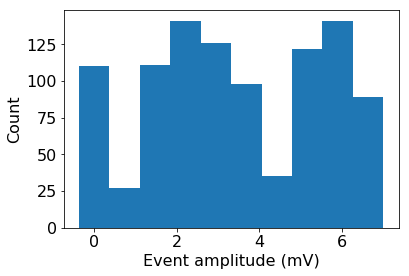

In [4]:
n_observations = 1000 # Number of PSPs we will observe
sizes = np.empty(n_observations) # Create an empty array of PSP size observations to be filled
n = 5 # Number of vesicle release sites
q = np.random.lognormal(0,1,n) # Sample distribution of size of quanta (i.e one quantum = impact of one vesicle)
p = np.random.beta(2,2,n) # Sample probabilities that a vesicle is released    
for event in range(n_observations):
    successful_release = np.random.rand(n)<p # Was a vesicle release (true/false) at each release site?  
    size_per_site = q*successful_release # What was the total contribution at each release site?  
    sizes[event] = size_per_site.sum() # Mark this event as having a size equal to the sum across sites.  
plt.hist(sizes,align='left'); # Plot a histogram
plt.xlabel('Event amplitude (mV)')
plt.ylabel('Count');

## How are the sizes of the quanta distributed across release sites?

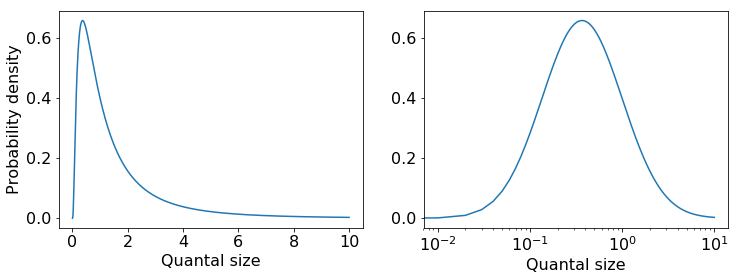

In [5]:
x = np.linspace(0,10,1000)
y = lognorm.pdf(x,1,scale=1)
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    ax[i].plot(x,y)
    ax[i].set_xlabel('Quantal size')
ax[0].set_ylabel('Probability density')
ax[1].set_xscale('log')

## What is the difference between a histogram and a probability density function?

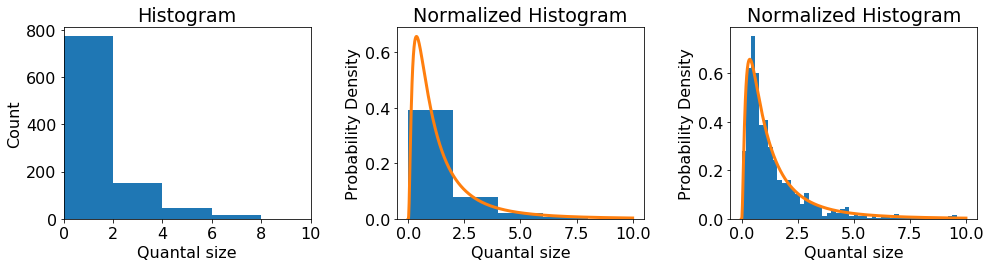

In [6]:
fig,ax = plt.subplots(1,3,figsize=(14,4))
y_obs = lognorm.rvs(1,scale=1,size=1000)
ax[0].hist(y_obs,bins=range(0,10,2))
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram')
ax[1].hist(y_obs,bins=range(0,10,2),normed=True)
ax[1].plot(x,y,linewidth=3)
ax[1].set_ylabel('Probability Density')
ax[1].set_title('Normalized Histogram')
ax[2].hist(y_obs,bins=np.arange(0,10,0.2),normed=True)
ax[2].plot(x,y,linewidth=3)
ax[2].set_ylabel('Probability Density')
ax[2].set_title('Normalized Histogram')
for i in range(3):
    ax[i].set_xlabel('Quantal size')
    ax[0].set_xlim(0,10)
#    ax[i].set_xlabel('Quantal size')
#ax[0].set_ylabel('Probability density')
#ax[1].set_xscale('log')
plt.tight_layout()

## How are the vesicle release probabilities distributed across release sites?

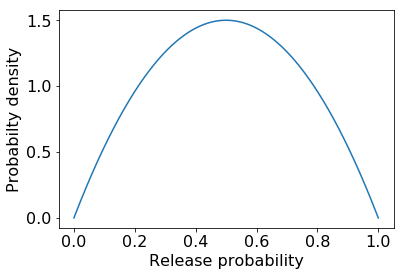

In [7]:
x = np.linspace(0,1,1000)
y = beta.pdf(x,2,2)
plt.plot(x,y)
plt.xlabel('Release probability')
plt.ylabel('Probabilty density');

## Examples of distributions seen in neuroscience (and everywhere else)

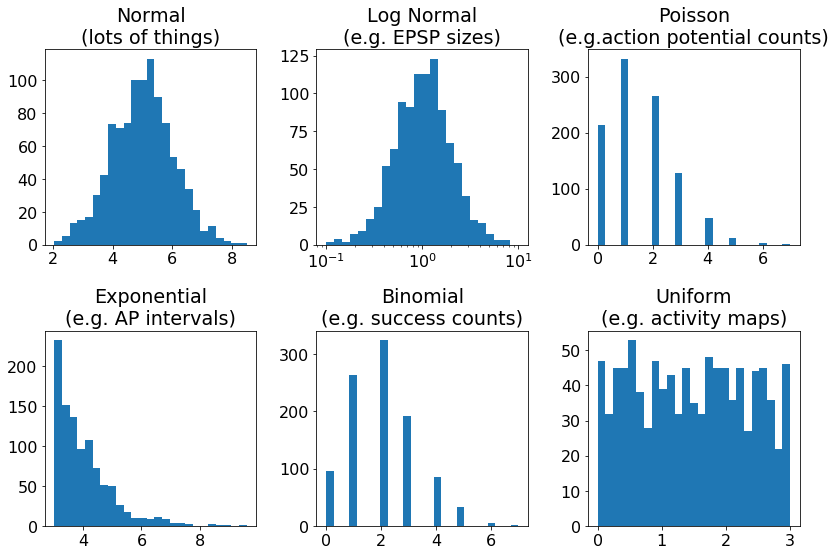

In [8]:
n = 1000
distributions = {'Normal\n(lots of things)':norm.rvs(5,size=n),
                 'Log Normal\n(e.g. EPSP sizes)':lognorm.rvs(0.7,size=n),
                 'Poisson\n(e.g.action potential counts)':poisson.rvs(1.5,size=n),
                 'Exponential\n(e.g. AP intervals)':expon.rvs(3,size=n),
                 'Binomial\n(e.g. success counts)':binom.rvs(10,0.2,size=n),
                 'Uniform\n(e.g. activity maps)':uniform.rvs(0,3,size=n)}
fig,axes = plt.subplots(2,3,figsize=(12,8))
ax = axes.flat
for i,(name,rvs) in enumerate(distributions.items()):
    ax[i].hist(rvs,bins=25 if i!=1 else np.logspace(-1,1,25))
    ax[i].set_title(name)
ax[1].set_xscale('log')
plt.tight_layout()

## Central limit theorem: Add up a bunch of random stuff and the result approaches a normal distribution

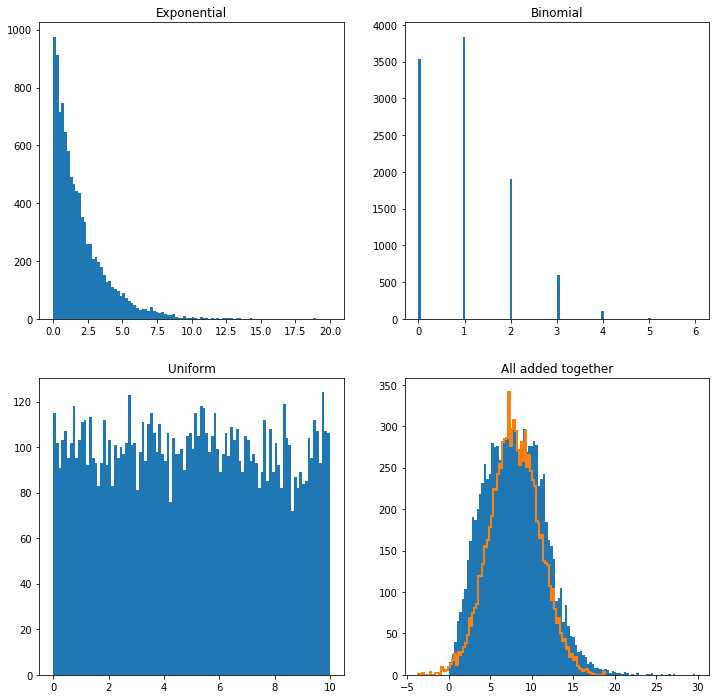

In [7]:
n = 10000
y = {'Exponential':expon.rvs(scale=2,size=n),
     'Binomial':binom.rvs(10,0.1,size=n),
     'Uniform':uniform.rvs(0,10,size=n)}
fig,axes = plt.subplots(2,2,figsize=(12,12))
ax = axes.flat
for i,(name,values) in enumerate(y.items()):
    ax[i].hist(values,bins=100)
    ax[i].set_title(name)
ax[3].hist(np.sum([y[key] for key in y],axis=0),bins=100)
ax[3].hist(norm.rvs(8,3,size=10000),bins=100,histtype='step',linewidth=2)
ax[3].set_title('All added together');

## Cumulative distributions

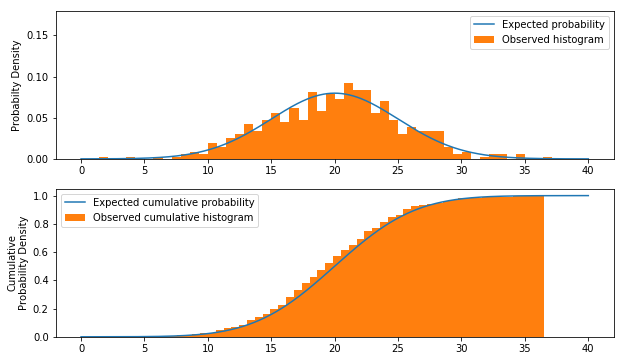

In [8]:
x = np.linspace(0,40,1000)
fig,ax = plt.subplots(2,1,figsize=(10,6))
ax[0].plot(x,norm.pdf(x,20,scale=5),label='Expected probability')
ax[0].hist(norm.rvs(20,5,size=500),bins=50,normed=True,label='Observed histogram')
ax[0].set_ylim(0,0.18)
ax[0].set_ylabel('Probabilty Density')
ax[0].legend()
ax[1].plot(x,norm.cdf(x,20,scale=5),label='Expected cumulative probability')
ax[1].hist(norm.rvs(20,5,size=500),bins=50,cumulative=True,normed=True,label='Observed cumulative histogram')
ax[1].set_ylabel('Cumulative\nProbability Density')
ax[1].legend();

## Example: when neurons grow on small islands with few neighbors, they make strong synapses; when they grow on big islands with lots of neighbors, they make weak synapses

![scaled-networks-of-controlled-size](http://www.jneurosci.org/content/jneuro/27/50/13581/F5.large.jpg?width=800&height=600&carousel=1)